## Importing Packages

In [ ]:
# Data Manipulation
import numpy as np
import pandas as pd
import random 
# Visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
# Cointegration test
from statsmodels.tsa.vector_ar.vecm import coint_johansen
# Robustness analysis
import statsmodels.api as sm
# Machine learning
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import OPTICS
# Other
plt.style.use('ggplot')

## Data Manipulation

##### 取得所有股票收盤價

In [48]:
# from finlab import data
# df = data.get('price:收盤價')
# df.to_csv("close.csv", index = 'date')  
df = pd.read_csv('Data/close.csv')
df.index = pd.to_datetime(df['date'])
df.sort_index(inplace = True)  # Sort the index of a DataFrame
df = df.drop(columns = 'date')
df.tail(5)

,0015,0050,0051,0052,0053,0054,0055,0056,0057,0058,...,9944,9945,9946,9949,9950,9951,9955,9958,9960,9962
date,,,,,,,,,,,,,,,,,,,,,
2024-09-30,NaN,183.95,81.60,177.10,97.6,NaN,29.35,38.66,134.50,NaN,...,20.40,48.95,28.75,25.50,14.35,65.2,36.40,222.0,NaN,16.95
2024-10-01,NaN,183.60,81.60,179.05,98.7,NaN,29.25,38.57,136.25,NaN,...,20.50,48.25,28.35,25.50,14.25,65.2,36.20,229.5,26.25,16.55
2024-10-04,NaN,183.60,80.30,179.25,98.5,NaN,29.05,38.35,135.70,NaN,...,20.60,47.80,26.95,25.00,14.20,64.8,37.00,223.0,26.25,16.55
2024-10-07,NaN,188.15,81.55,184.15,100.3,NaN,29.45,38.64,138.40,NaN,...,20.65,48.45,27.50,24.95,14.20,64.8,36.45,223.5,26.40,16.35
2024-10-08,NaN,187.25,81.10,183.65,100.5,NaN,29.30,38.43,138.10,NaN,...,20.55,47.95,26.80,25.25,14.15,64.5,35.55,215.0,26.50,16.10


#### 取得市值資料

In [3]:
# m1 = pd.read_excel('Listed company market value/20130101_20140629.xlsx')
# m2 = pd.read_excel('Listed company market value/20140630_20150630.xlsx')
# m3 = pd.read_excel('Listed company market value/20150701_20170630.xlsx')
# m4 = pd.read_excel('Listed company market value/20170701_20190630.xlsx')
# m5 = pd.read_excel('Listed company market value/20190701_20210630.xlsx')
# m6 = pd.read_excel('Listed company market value/20210701_20230630.xlsx')
# m7 = pd.read_excel('Listed company market value/20230701_20240630.xlsx')

# market = pd.concat([m1, m2, m3, m4, m5, m6, m7], ignore_index=True)
# market.rename(columns={'年月日':'date'}, inplace=True)
# market.index = pd.to_datetime(market['date'])
# market.sort_index(inplace = True)
# market = market.drop(columns = 'date')

# name = market.columns.str.split().str[0]  # use space to split column names and choose the first item.
# market.columns = name
# market.to_excel("Market.xlsx", index = 'date')

In [49]:
market = pd.read_excel('Data/Market.xlsx', index_col='date')
market = market[[col for col in market.columns if not col[0].isalpha()]]  # 刪除字母開頭的clolumn
market.tail(5)

,0050,0051,0052,0053,0055,0056,0057,0061,006203,006204,...,6890,6901,6906,6914,6916,6928,6933,6937,6952,6957
date,,,,,,,,,,,,,,,,,,,,,
2024-06-24,410228,1680,8177,501,1859,299644,206,2230,892,171,...,76316.0,35587.0,4913.0,10629.0,1910.0,6596.0,14083.0,13833.0,3499.0,0.0
2024-06-25,409086,1683,8174,499,1889,299220,206,2227,888,170,...,76316.0,35927.0,4980.0,10596.0,1890.0,6519.0,14041.0,13462.0,3513.0,16563.0
2024-06-26,412311,1683,8363,506,1873,298578,208,2210,896,171,...,76940.0,37543.0,5031.0,10497.0,1904.0,7164.0,14437.0,14778.0,3479.0,15597.0
2024-06-27,412200,1683,8338,505,1861,296763,208,2209,898,171,...,84547.0,36055.0,5031.0,10563.0,1900.0,7878.0,14104.0,14474.0,3472.0,13278.0
2024-06-28,414758,1689,8408,508,1878,298615,210,2222,905,173,...,82302.0,38011.0,5031.0,10994.0,1893.0,7938.0,14009.0,14440.0,3458.0,14686.0


In [46]:
top_50_stocks = []

for date, row in market.iterrows():
    # 挑選出該天市值前 50 名的股票
    top_50 = row.dropna().nlargest(50)
    # 將結果轉換成兩列（日期，股票），並存入列表
    top_50_stocks.extend([(date, stock) for stock in top_50.index])

MarketComposition = pd.DataFrame(top_50_stocks, columns=['Date', 'Symbols'])
MarketComposition.index = pd.to_datetime(MarketComposition['Date'])
MarketComposition = MarketComposition.drop(columns = 'Date')
MarketComposition = MarketComposition[(MarketComposition.index >= '2013-06-30') & (MarketComposition.index <= '2023-12-31')].copy()
MarketComposition

,Symbols
Date,
2013-07-01,2330
2013-07-01,2317
2013-07-01,2412
2013-07-01,6505
2013-07-01,1303
...,...
2023-12-29,2379
2023-12-29,2408
2023-12-29,3443


#### Splitting in-sample and out-of-sample data
- In-sample: 1 year
- Out-of-sample: 6 months

In [6]:
df = df.copy()

inSample = {}
outofSample = {}
update_date = pd.Timestamp('2014-06-30')
count = 1
while update_date <= pd.Timestamp('2023-12-31'):
    inSample_mask = (df.index > (update_date - pd.DateOffset(months=12))) & (df.index <= (update_date))  # DateOffset is an object used to create date offsets in pandas
    inSample[count] = df.loc[inSample_mask]  # key:count, value:closing price of all stocks in the inSample（it's a dataframe)

    outofSample_mask = (df.index > (update_date)) & (df.index <= (update_date + pd.DateOffset(months=6)))
    outofSample[count] = df.loc[outofSample_mask]
   
    count += 1
    update_date += pd.DateOffset(months=6)
# In-sample tail
print("In-sample tail:\n", inSample[10].iloc[:, :5].tail())

# Out-of-sample head
print("Out-of-sample head:\n", outofSample[10].iloc[:, :5].head())

In-sample tail:
             0015   0050   0051   0052   0053
date                                        
2018-12-24   NaN  74.70  28.39  47.51  30.18
2018-12-25   NaN  73.75  27.93  46.57  29.87
2018-12-26   NaN  73.55  28.14  46.93  29.98
2018-12-27   NaN  75.05  28.33  48.05  30.32
2018-12-28   NaN  75.50  28.30  48.11  30.50
Out-of-sample head:
             0015   0050   0051   0052   0053
date                                        
2019-01-02   NaN  74.05  28.11  47.60  30.53
2019-01-03   NaN  73.35  28.02  46.80  30.03
2019-01-04   NaN  72.20  27.82  45.56  29.01
2019-01-07   NaN  73.95  28.25  46.90  29.74
2019-01-08   NaN  73.65  28.30  46.37  29.47


#### 篩選出市值前 50 的股票

In [7]:
# 用每天都用市值前50的股票篩選（每組樣本期間內保留的股票其市值皆為前50）
for index, data in inSample.items():
    for i in range(0,len(data.index)):
        # 獲取當天市值前 50 大股票的代號
        date = data.index[i]  # 假設 date 為 inSample 中 data 的第 i 行索引值
        top50_symbols = MarketComposition.loc[MarketComposition.index == date, 'Symbols'].tolist()
        # 過濾出 inSample 中符合市值前 50 的股票代號
        valid_columns = [sym for sym in top50_symbols if sym in data.columns]
        if valid_columns:
            # 將符合的股票資料篩選並更新 inSample
            inSample[index] = data[valid_columns]
        else:
            print(f"警告：日期 {date} 沒有市值前 50 大的股票代號匹配的資料")  # 基本不會出現

#### 處理遺漏值並刪除不在 insample 的 outsample 股票

In [51]:
for i in range(1, len(inSample)+1):
    inSample[i] = inSample[i].ffill()  # Forward fill to handle missing values in inSample data
    inSample[i] = inSample[i].dropna(axis=1, how='any')  # 股票的 column 在 ffill 之後還有 NaN 就整個 column 刪除
    outofSample[i] = outofSample[i][inSample[i].columns].ffill()  # Remove any columns in outofSample[i] that are not present in inSample[i], and forward fill missing values.
    outofSample[i] = outofSample[i].dropna(axis=1, how='any')     
# Print cleaned inSample tail
print("In-sample tail:\n", inSample[1].iloc[:, :5].tail())

# Print cleaned outofSample head
print("Out-of-sample head:\n", outofSample[1].iloc[:, :5].head())

In-sample tail:
              2330   2317   2454  2412  6505
date                                       
2014-06-24  123.0   98.2  505.0  96.4  76.4
2014-06-25  123.5   96.5  505.0  96.1  77.1
2014-06-26  124.5   98.5  515.0  96.0  77.7
2014-06-27  125.5   98.6  501.0  96.5  78.0
2014-06-30  126.5  100.0  505.0  96.2  77.8
Out-of-sample head:
              2330   2317   2454  2412  6505
date                                       
2014-07-01  128.0  102.0  508.0  96.1  76.7
2014-07-02  132.5  103.0  518.0  96.0  75.5
2014-07-03  134.5  104.0  535.0  95.8  75.0
2014-07-04  135.0  103.0  526.0  95.6  74.5
2014-07-07  136.0  103.5  531.0  95.6  74.0


## Johansen's Approach

Attributes
- **cvm**  
    Critical values (90%, 95%, 99%) of maximum eigenvalue statistic.

- **lr2**  
    Maximum eigenvalue statistic.
  
- **r0t**  
    Residuals for $\Delta Y$.
  
- **rkt**  
    Residuals for $Y_{-1}$.

In [ ]:
class Johansen:
    """
    This class performs the Johansen cointegration test and provides related calculations.
    
    Attributes:
    -----------
    data : array-like
        Time series data for the cointegration test.
    det_order : int, optional
        Order of deterministic terms in the cointegration test.
    k_ar_diff : int, optional
        Number of lags to include in the cointegration test.
    ct : JohansenTestResult, optional
        Result of the cointegration test.
    """
    
    def __init__(self, data, det_order = 0, k_ar_diff = 1):
        """
        Initializes the Johansen class with the provided parameters.
        
        Parameters:
        -----------
        data : array-like
            Time series data for the cointegration test.
        det_order : int, optional
            Order of deterministic terms in the cointegration test.
        k_ar_diff : int, optional
            Number of lags to include in the cointegration test.
        """
        self.data = data
        self.det_order = det_order
        self.k_ar_diff = k_ar_diff
        self.ct = coint_johansen(self.data, det_order = self.det_order, k_ar_diff = self.k_ar_diff)

    def n_coint_vectors(self):
        """
        Calculates the number of cointegrated vectors based on the cointegration test result.
        
        Returns:
        --------
        n_vectors : int
            Number of cointegrated vectors.
        """
        return len(np.where(self.ct.lr2 > self.ct.cvm[:, 1])[0])  # 5% 顯著水準

    def beta(self):
        """
        Calculates the cointegrated eigenvectors (beta) based on the cointegration test result.
        
        Returns:
        --------
        beta : array-like
            Cointegrated eigenvectors.
        """
        return self.ct.evec[:, np.where(self.ct.lr2 > self.ct.cvm[:, 1])[0]]  # 5% 顯著水準

    def alpha(self):  # Maximum Likelihood Estimate
        """
        Calculates the estimated alpha matrix based on the cointegration test result.
        
        Returns:
        --------
        alpha : array-like
            Estimated alpha matrix.
        """
        r0t = np.transpose(self.ct.r0t)
        r1t = np.transpose(self.ct.rkt)

        S01 = np.dot(r0t, r1t.T) / r0t.shape[1]
        S11 = np.dot(r1t, r1t.T) / r0t.shape[1]

        beta = self.beta()
        return S01 @ beta @ np.linalg.inv(beta.T @ S11 @ beta)

    def Phi(self):
        """
        Calculates the Phi matrix based on the cointegration test result.
        
        Returns:
        --------
        Phi : array-like
            Phi matrix.
        """
        return np.dot(self.alpha(), self.beta().T)

    def residuals(self):
        """
        Calculates the residuals based on the cointegration test result.
        
        Returns:
        --------
        residuals : array-like
            Residuals.
        """
        return np.dot(self.Phi(), self.data.T)

## Backtest Class

In [ ]:
class Backtest:
    def __init__(self, inSample, outofSample, entry_point = 2, exit_point=0, stop_loss=None, det_order=0, k_ar_diff=1):
        """
        Initializes the Backtest class.

        Parameters:
        -----------
        data : DataFrame
            DataFrame containing the financial data.
        det_order : int, optional
            Order of deterministic components in the cointegration test (default is 0).
        k_ar_diff : int, optional
            Number of lags to difference the data in the cointegration test (default is 1).
        """
        self.inSample = inSample
        self.outofSample = outofSample
        self.entry_point = entry_point
        self.exit_point = exit_point
        self.stop_loss = stop_loss
        self.det_order = det_order
        self.k_ar_diff = k_ar_diff
        self.johansen = Johansen(inSample, det_order, k_ar_diff)
        self._hedge_ratio = self.hedge_ratio()

    def hedge_ratio(self):
        """
        Calculates the hedge ratio (Phi) based on the Johansen cointegration analysis.

        Returns:
        --------
        hedge_ratio : array-like
            Hedge Ratios.
        """
        HR = self.johansen.Phi()[0]

        return HR / HR[0]  # normalize
    
    def weight(self):
        """
        Calculates the weights for each asset in the portfolio.

        Returns:
        --------
        weights : array-like
            Portfolio weights.
        """

        return np.round(self._hedge_ratio / np.sum(self._hedge_ratio), 2) 

    def spread(self):
        """
        Calculates the spread based on the hedge ratio and the financial data.

        Returns:
        --------
        spread : array-like
            Spread.
        """
        return np.nan_to_num(np.dot(self._hedge_ratio, self.outofSample.T))

    def z_score(self):
        """
        Calculates the z-score of the spread.

        Returns:
        --------
        z_score : DataFrame
            Z-scores.
        """
        mean = np.mean(self.spread())
        std = np.std(self.spread())

        return (self.spread() - mean) / std
    
    def signal(self):
        """
        Generates trading signals based on the calculated z-score.

        Returns:
        --------
        signals : DataFrame
            DataFrame containing the generated trading signals (1: long, -1: short, 0: no signal).
        """
        position = 0
        signals = []
        z_score = self.z_score()

        # Loop through the data to generate signals
        for i in range(0, len(z_score)):  # loop一組樣本的每個(每天的)z_score
            t = z_score[i]

            # Generate signals based on z-score values
            # Entry points
            if t <= -self.entry_point and position == 0:  # 做多
                position = 1  # open position
                signals.append(position)
            elif t >= self.entry_point and position == 0:  # 做空
                position = -1  # open position
                signals.append(position)
            # Exit points
            elif t >= -self.exit_point and (position == 1 or position == 2):  # 多單出場
                position = 0  # close position
                signals.append(position)
            elif t <= self.exit_point and (position == -1 or position == -2):  # 空單出場
                position = 0  # close position
                signals.append(position)
            # Stop loss
            elif self.stop_loss is not None:
                if t <= -self.stop_loss and position == 1:  # 多單止損
                    position = 2  # close position
                    signals.append(position)
                elif t >= self.stop_loss and position == -1:  # 空單止損
                    position = -2  # close position
                    signals.append(position)
                # Hold signal
                else:
                    signals.append(position)   
            # Hold signal
            else:
                signals.append(position)

        return pd.DataFrame({"Signal": signals}, index=self.outofSample.index).shift(1) # Shift to avoid look-ahead bias

    def port_rtn(self):
        """
        Calculates the daily returns of the portfolio based on the generated signals.

        Returns:
        --------
        port_returns : DataFrame
            DataFrame containing the calculated daily portfolio returns.
        """
        stock_rtn = np.log(self.outofSample).diff().fillna(0)
        port_rtn = []
        signal = self.signal()
        
        # Loop through the data to calculate portfolio returns
        for i in range(0, len(self.outofSample)):
            if signal.iloc[i, 0] == 1:
                rtn = np.dot(self.weight(), stock_rtn.iloc[i]) - 0.0003 # minus transaction costs
            elif signal.iloc[i, 0] == -1:
                rtn = - np.dot(self.weight(), stock_rtn.iloc[i]) - 0.0003 # minus transaction costs
            else:
                rtn = 0

            port_rtn.append(rtn)

        return pd.DataFrame({"Returns": port_rtn}, index=self.outofSample.index)


## Performance Measures

In [212]:
class Performance:
    def __init__(self, portfolio, benchmark=None):
        """
        Initializes the Performance class with portfolio returns and an optional benchmark.

        Parameters:
        -----------
        portfolio : pandas.Series
            Time series of portfolio returns.
        benchmark : pandas.Series, optional
            Time series of benchmark returns (default is None).
        """
        self.portfolio = portfolio
        self.benchmark = benchmark

    def annual_rtn(self):
        """
        Calculates the annualized returns of the portfolio and benchmark.

        Returns:
        --------
        tuple
            Tuple containing the annualized portfolio returns and benchmark returns.
        """
        _portfolio = round(100 * (np.mean(self.portfolio) * 252), 2)
        _benchmark = None
        if self.benchmark is not None:
            _benchmark = round(100 * (np.mean(self.benchmark) * 252), 2)
        return _portfolio, _benchmark

    def annual_std(self):
        """
        Calculates the annualized standard deviation of the portfolio and benchmark.

        Returns:
        --------
        tuple
            Tuple containing the annualized portfolio standard deviation and benchmark standard deviation.
        """
        _portfolio = round(100 * (np.std(self.portfolio, axis=0) * np.sqrt(252)), 2).iloc[0]
        _benchmark = None
        if self.benchmark is not None:
            _benchmark = round(100 * (np.std(self.benchmark) * np.sqrt(252)), 2).iloc[0]
        return _portfolio, _benchmark

    def sharpe_ratio(self):
        """
        Calculates the Sharpe ratio of the portfolio and benchmark.

        Returns:
        --------
        tuple
            Tuple containing the Sharpe ratio of the portfolio and benchmark.
        """
        _portfolio = round(self.annual_rtn()[0] / self.annual_std()[0], 2)
        _benchmark = None
        if self.benchmark is not None:
            _benchmark = round(self.annual_rtn()[1] / self.annual_std()[1], 2)
        return _portfolio, _benchmark

    def sortino_ratio(self):
        """
        Calculates the Sortino ratio of the portfolio and benchmark.

        Returns:
        --------
        tuple
            Tuple containing the Sortino ratio of the portfolio and benchmark.
        """
        _portfolio_downside = round(100 * (np.std(self.portfolio[self.portfolio < 0], axis=0) * np.sqrt(252)), 2)
        _portfolio = round(self.annual_rtn()[0] / _portfolio_downside, 2).iloc[0]
        _benchmark = None
        if self.benchmark is not None:
            _benchmark_downside = round(100 * (np.std(self.benchmark[self.benchmark < 0], axis=0) * np.sqrt(252)), 2)
            _benchmark = round(self.annual_rtn()[1] / _benchmark_downside, 2).iloc[0]
        return _portfolio, _benchmark

    def annual_VaR(self):
        """
        Calculates the annualized Value at Risk (VaR) of the portfolio and benchmark.

        Returns:
        --------
        tuple
            Tuple containing the annualized portfolio VaR and benchmark VaR.
        """
        _portfolio = round(self.portfolio.quantile(0.05) * np.sqrt(252), 2).iloc[0]
        _benchmark = None
        if self.benchmark is not None:
            _benchmark = round(self.benchmark.quantile(0.05) * np.sqrt(252), 2)[0]
        return _portfolio, _benchmark

    def annual_CVaR(self):
        """
        Calculates the annualized Conditional Value at Risk (CVaR) of the portfolio and benchmark.

        Returns:
        --------
        tuple
            Tuple containing the annualized portfolio CVaR and benchmark CVaR.
        """
        _portfolio = round(self.portfolio[self.portfolio < self.portfolio.quantile(0.05)].mean() * np.sqrt(252), 2).iloc[0]
        _benchmark = None
        if self.benchmark is not None:
            _benchmark =  round(self.benchmark[self.benchmark < self.benchmark.quantile(0.05)].mean() * np.sqrt(252), 2).iloc[0]
        return _portfolio, _benchmark

    def worst_drawdown(self):
        """
        Calculates the worst drawdown of the portfolio and benchmark.

        Returns:
        --------
        tuple
            Tuple containing the worst drawdown of the portfolio and benchmark.
        """
        _portfolio_cum_rtn = self.portfolio.cumsum()
        _portfolio_max_rtn = _portfolio_cum_rtn.cummax()
        _portfolio_drawdown = (_portfolio_cum_rtn - _portfolio_max_rtn) / (1 + _portfolio_max_rtn)
        _portfolio_worst_drawdown = round(_portfolio_drawdown.min(), 2).iloc[0]

        _benchmark_worst_drawdown = None
        if self.benchmark is not None:
            _benchmark_cum_rtn = self.benchmark.cumsum()
            _benchmark_max_rtn = _benchmark_cum_rtn.cummax()
            _benchmark_drawdown = (_benchmark_cum_rtn - _benchmark_max_rtn) / (1 + _benchmark_max_rtn)
            _benchmark_worst_drawdown = round(_benchmark_drawdown.min(), 2).iloc[0]

        return _portfolio_worst_drawdown, _benchmark_worst_drawdown

    def plot_performance(self):
        """
        Plots the cumulative returns and drawdown of the portfolio and benchmark.
        """
        _portfolio_cum_rtn = self.portfolio.cumsum()
        _portfolio_max_rtn = _portfolio_cum_rtn.cummax()
        _portfolio_drawdown = (_portfolio_cum_rtn - _portfolio_max_rtn) / (1 + _portfolio_max_rtn)

        plt.figure(figsize=(12, 6))

        ### Plot cumulative returns for portfolio
        plt.subplot(2, 1, 1)
        plt.plot(_portfolio_cum_rtn.index, _portfolio_cum_rtn, label='Portfolio Cumulative Returns', color='#013360', linewidth=2, alpha=0.8)

        # Plot cumulative returns for benchmark if available
        if self.benchmark is not None:
            _benchmark_cum_rtn = self.benchmark.cumsum()
            plt.plot(_benchmark_cum_rtn.index, _benchmark_cum_rtn, label='Benchmark Cumulative Returns', color='#83bc5c', linewidth=2, alpha=0.8)

        # Formatting
        plt.title('Performance Comparison', fontsize=12)
        plt.ylabel('Cumulative Returns', fontsize=10)
        plt.legend(loc='best', framealpha=0.7)

        ### Plot drawdown for portfolio
        plt.subplot(2, 1, 2)
        plt.plot(_portfolio_drawdown.index, _portfolio_drawdown.values, color='#ee0000', label='Portfolio Drawdown', linewidth=2, alpha=0.8)

        # Plot benchmark drawdown if available
        if self.benchmark is not None:
            _benchmark_max_rtn = _benchmark_cum_rtn.cummax()
            _benchmark_drawdown = (_benchmark_cum_rtn - _benchmark_max_rtn) / (1 + _benchmark_max_rtn)
            plt.plot(_benchmark_drawdown.index, _benchmark_drawdown.values, color='#ef8b47', label='Benchmark Drawdown', linewidth=2, alpha=0.8)

        # Formatting
        plt.xlabel('Date', fontsize=10)
        plt.ylabel('Drawdown (%)', fontsize=10)
        plt.legend(loc='best', framealpha=0.7)

        plt.tight_layout()

    def summary_table(self):
        """
        Generates a summary table with various performance metrics of the portfolio and benchmark.

        Returns:
        --------
        pandas.DataFrame
            DataFrame containing the summary metrics.
        """
        metrics = pd.DataFrame({
            'portfolio': {'Annualized Returns': self.annual_rtn()[0],
                          'Annualized Standard Deviation': self.annual_std()[0],
                          'Sharpe Ratio': self.sharpe_ratio()[0],
                          'Sortino Ratio': self.sortino_ratio()[0],
                          'Annualized VaR 95%': self.annual_VaR()[0],
                          'Annualized CVaR 95%': self.annual_CVaR()[0],
                          'Worst Drawdown': self.worst_drawdown()[0]},
            'benchmark': {'Annualized Returns': self.annual_rtn()[1],
                          'Annualized Standard Deviation': self.annual_std()[1],
                          'Sharpe Ratio': self.sharpe_ratio()[1],
                          'Sortino Ratio': self.sortino_ratio()[1],
                          'Annualized VaR 95%': self.annual_VaR()[1],
                          'Annualized CVaR 95%': self.annual_CVaR()[1],
                          'Worst Drawdown': self.worst_drawdown()[1]}
            })
        
        return metrics

## Implementation

### 隨機選取

[-8.98005931e-03 -2.84711598e-03 -1.31216738e-03  2.12461877e-04
 -1.13424181e-04  2.84283941e-02 -2.50589179e-02 -7.45709010e-05
 -9.29490383e-05  5.81346346e-03]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[-0.11274147  0.00799876 -0.02466759  0.00469434  0.06905429  0.15382732
  0.00115625 -0.00944458 -0.00181241  0.18610146]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[-0.12819783 -0.57395814 -0.09081563  0.00396179  0.09703142  0.00378275
  0.30368499  0.13848271  0.07549491 -0.00420822]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 7.63646599e-04 -7.80599870e-04  8.21408258e-04  1.09969052e-03
 -1.71173310e-06  8.50278319e-04 -1.77386834e-05 -1.89870015e-03
 -3.22919598e-05  5.41227284e-03]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[-0.19456145 -0.0100696   0.01075378  0.11069341  0.00128589 -0.01853983
 -0.0023312  -0.04542844  0.09536

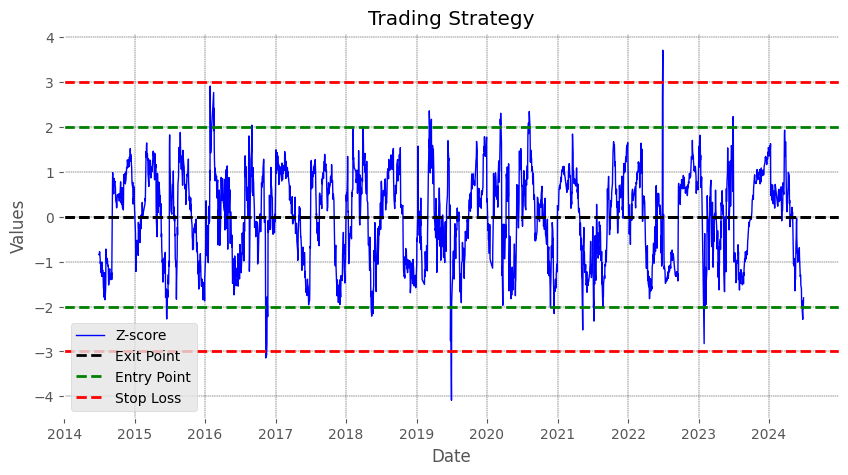

,portfolio,benchmark
Annualized Returns,-5.34,None
Annualized Standard Deviation,12.62,None
Sharpe Ratio,-0.42,None
Sortino Ratio,-0.18,None
Annualized VaR 95%,-0.03,None
Annualized CVaR 95%,-0.32,None
Worst Drawdown,-0.71,None


In [181]:
# Define signals
entry_point = 2
exit_point = 0
stop_loss = 3

# Define an empty dictionary to store the results
strategy = {}
portfolio = {}
weights = {} 

for i in range(1, len(inSample)+1):
# for i in range(1, 2):

    cointegrated = False

    while not cointegrated:  # 當 cointegrated 還沒有設為 True 時，這個循環會一直執行
        # Select stocks randomly 
        selected_columns = random.sample(list(inSample[i].columns), 10)  # 從 inSample[i] 的 column 中隨機選擇 10 個 column
        _inSample = inSample[i][selected_columns]
        _outofSample = outofSample[i][selected_columns]
        
        # Test for cointegration
        coint = Johansen(_inSample).n_coint_vectors()
        print(Johansen(_inSample).Phi()[0])
        if coint >= 1:
            # Run backtest
            backtest = Backtest(inSample=_inSample, outofSample=_outofSample, entry_point=entry_point, exit_point=exit_point, stop_loss=stop_loss)
            strategy[i] = pd.DataFrame({"Z-score": backtest.z_score()}, index=_outofSample.index)
            portfolio[i] = backtest.port_rtn()
            weights[i] = pd.DataFrame({"Asset": selected_columns, "Weight": backtest.weight()}, index=[i]*10)
            
            cointegrated = True
        else:
            # Set backtest to 0 or handle as needed
            portfolio[i] = pd.DataFrame([0] * len(_outofSample), index=_outofSample.index)

# concatenate all DataFrames into a single DataFrame
strategy = pd.concat(strategy.values(), axis=0)  
portfolio = pd.concat(portfolio.values(), axis=0)  # 日報酬
weights = pd.concat(weights.values(), axis=0)  # 每組投資組合及權重

# Plot z-score and signals
# Plotting
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(strategy.index, strategy.iloc[:,0], label='Z-score', color='blue', linewidth=1)
ax.axhline(y=-exit_point, color='black', linestyle='--', linewidth=2, label='Exit Point')
ax.axhline(y=exit_point, color='black', linestyle='--', linewidth=2)
ax.axhline(y=-entry_point, color='green', linestyle='--', linewidth=2, label='Entry Point')
ax.axhline(y=entry_point, color='green', linestyle='--',linewidth=2)
ax.axhline(y=-stop_loss, color='red', linestyle='--', linewidth=2, label='Stop Loss')
ax.axhline(y=stop_loss, color='red', linestyle='--', linewidth=2)
ax.set_ylabel('Values')
ax.set_xlabel('Date')
ax.set_facecolor('white')
ax.grid(color='black', linestyle='--', linewidth=0.3)
ax.set_title("Trading Strategy")
ax.legend()
plt.show()
performance = Performance(portfolio=portfolio)
performance.summary_table()

### Clustering using Unsupervised Learning

,portfolio,benchmark
Annualized Returns,9.70,None
Annualized Standard Deviation,11.84,None
Sharpe Ratio,0.82,None
Sortino Ratio,0.37,None
Annualized VaR 95%,-0.04,None
Annualized CVaR 95%,-0.22,None
Worst Drawdown,-0.32,None


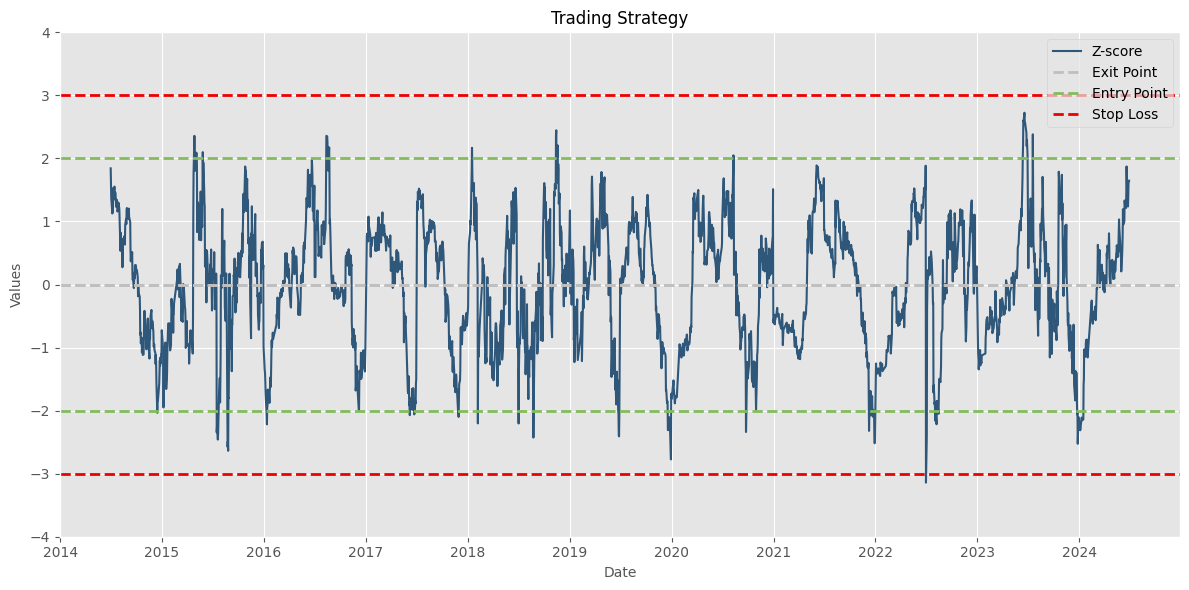

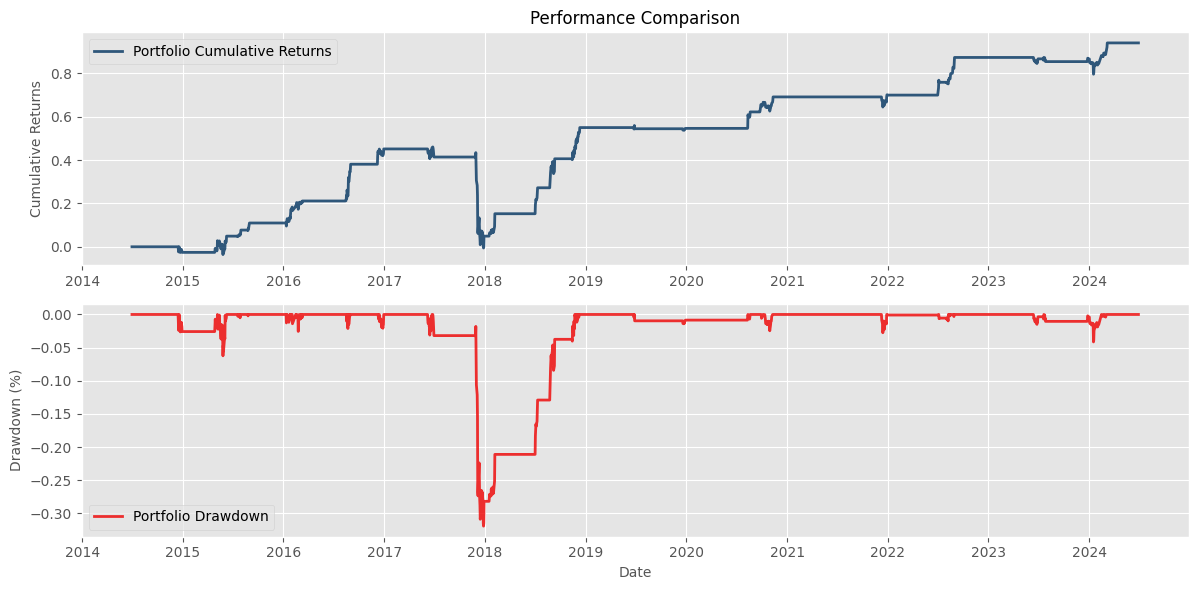

In [247]:
# Define signals
entry_point = 2
exit_point = 0
stop_loss = 3
n_components = 0.5  # 實證
min_samples = 2  # 最少多少樣本才能構成一個cluster 

# Define an empty dictionary to store the results
strategy = {}
portfolio = {}
weights = {} 

for i in range(1, len(inSample)+1):
# for i in range(7, 8):

    cointegrated = False

    ### Clustering using Unsupervised Learning
    # 計算收益率
    df_ret = inSample[i].pct_change()
    df_ret.dropna(axis = 0, how = 'all', inplace = True)  # drop first row (NA)
    ## 標準化
    scaler = preprocessing.StandardScaler()
    df_ret_scaled = scaler.fit_transform(df_ret)

    ## PCA analysis
    pca = PCA(n_components = n_components)  # 保留主成分解釋資料的變異%數 or 主成分個數
    pca.fit(df_ret_scaled)
    # print('降維後的維度數:', pca.n_components_)
    # if pca.n_components_ > 15:  # 若維度>15則直接用15個維度，為了避免維度詛咒
    #     pca = PCA(n_components = 15)  
    #     pca.fit(df_ret_scaled)

    X = pca.components_.T  # return data after PCA (factor loadings 的概念)
    
    ## Compute OPTICS
    clust = OPTICS(min_samples = min_samples, cluster_method = 'xi', metric = 'minkowski').fit(X)
    labels = clust.labels_  # 每個數據點的聚類標籤
    reachability = clust.reachability_

    cluster = np.array([inSample[i].columns, labels, reachability]).T[clust.ordering_]
    cluster = pd.DataFrame(cluster, columns = ['symbols', 'labels', 'reachability'])
    cluster.iloc[0, 2] = 0

    avg_reachability = cluster.groupby('labels')['reachability'].mean().sort_values(ascending = True)  # 按照 reachability 排列 labels
    labels_sorted = avg_reachability.index

    testlist = []
    for label in labels_sorted:
        stock = cluster[cluster['labels'] == label]['symbols'].tolist()
        testlist.append({
         f'{label}' : stock           
    })
        
    ### Test for cointegration (從最密集的cluster開始檢定，直到顯著)
    for h in range(len(labels_sorted)):  
        
        selected_columns = list(testlist[h].values())[0]
        ## 限制每個cluster的最大樣本數
        # if len(selected_columns) > 10:
        #     print('number > 10')
        #     continue

        _inSample = inSample[i][selected_columns]
        _outofSample = outofSample[i][selected_columns]
        
        coint = Johansen(_inSample).n_coint_vectors()
        # print(Johansen(_inSample).Phi())
        if coint >= 1:
            # Run backtest
            backtest = Backtest(
                inSample = _inSample, 
                outofSample = _outofSample, 
                entry_point = entry_point, 
                exit_point = exit_point, 
                stop_loss = stop_loss
            )
            strategy[i] = pd.DataFrame({"Z-score": backtest.z_score()}, index = _outofSample.index)
            portfolio[i] = backtest.port_rtn()
            weights[i] = pd.DataFrame(
                {"Asset": selected_columns, "Weight": backtest.weight()}, 
                index=[i]*len(selected_columns)  # 使用實際選擇的股票數量
            )
            # print(f'直到第 {h+1} 次檢定出現共整合關係', '\nlabel:', int(list(testlist[h].keys())[0]))
            # print('symbols:', selected_columns)
            # print('------------------------------------------------------------------------')
            cointegrated = True
            break  # 找到共整合的群集後立即退出循環

    ## 如果所有群集都沒有共整合關係，設置空的投資組合
    if not cointegrated:
        portfolio[i] = pd.DataFrame([0] * len(_outofSample), index=_outofSample.index)

    ## Plot out of sample stock price
    # plt.figure(figsize=(12, 6))
    # for column in _outofSample.columns:
    #     plt.plot(_outofSample.index, _outofSample[column], label=column, linewidth=2, alpha=0.8)

    # # Formatting
    # plt.title("Pair stock price", fontsize=12)
    # plt.xlabel('Date', fontsize=10)
    # plt.ylabel('Close price', fontsize=10)
    # plt.legend(loc='best', framealpha=0.7)
    # plt.tight_layout()  # Optimize layout

# concatenate all DataFrames into a single DataFrame
strategy = pd.concat(strategy.values(), axis = 0)  
portfolio = pd.concat(portfolio.values(), axis = 0)  # 日報酬
weights = pd.concat(weights.values(), axis = 0)  # 每組投資組合及權重

### Plot z-score and signals
plt.figure(figsize=(12, 6))

plt.plot(strategy.index, strategy.iloc[:,0], label='Z-score', color='#013360', linewidth=1.5, alpha=0.8)
plt.axhline(y=-exit_point, color='#bfbfbf', linestyle='--', linewidth=2, label='Exit Point')
plt.axhline(y=exit_point, color='#bfbfbf', linestyle='--', linewidth=2)
plt.axhline(y=-entry_point, color='#83bc5c', linestyle='--', linewidth=2, label='Entry Point')
plt.axhline(y=entry_point, color='#83bc5c', linestyle='--', linewidth=2)
plt.axhline(y=-stop_loss, color='#ee0000', linestyle='--', linewidth=2, label='Stop Loss')
plt.axhline(y=stop_loss, color='#ee0000', linestyle='--', linewidth=2)

# Formatting
plt.yticks(np.arange(-4, 5, 1))  # Tick settings
plt.title("Trading Strategy", fontsize=12)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Values', fontsize=10)
plt.legend(loc='best', framealpha=0.7)
plt.tight_layout()  # Optimize layout

performance = Performance(portfolio = portfolio)
performance.plot_performance()
performance.summary_table()

In [230]:
portfolio.to_csv('Portfolio_Return.csv', index=True)
weights.to_csv('Portfolio_Weights.csv', index=True)
performance.summary_table().to_csv('Performance_Metrics.csv', index=True)